# Importing all necessary libraries

In [1]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

<IPython.core.display.Javascript object>

In [2]:
!pip install dateparser

In [3]:
import dateparser

## Data Preprocessing

* Regex cheatsheet
    * https://www.rexegg.com/regex-quickstart.html
* Datetime format
    * http://strftime.org/

In [4]:
def rawToDf(file):
    with open(file, 'r', encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall('\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s', raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
   
    # converting date-time pattern which is of type String to type datetime, format is to be specified for the whole string where the placeholders are extracted by the method    
        try:
            df['date_time'] = df['date_time'].apply(lambda x: dateparser.parse(x))
        except:
            print("oo")
        try:
            df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%y, %I:%M %p - ') #10/20/19, 10:24 pm - 
        except:
            df['date_time'] = pd.to_datetime(df['date_time'], format='%d/%m/%Y, %I:%M %p - ') #20/10/2019, 10:24 pm -
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [5]:
me = "Shivani Sachan"

### Data

In [7]:
df = rawToDf('../WhatsApp Chat with SecurelyShare. 😇.txt')

In [8]:
df.head()

,date_time,user,msg
0,2018-08-30 11:58:00,grp_notif,Messages to this group are now secured with en...
1,2017-12-04 16:25:00,grp_notif,"Shaik Meeran created group ""SecurelyShare. 😇"""
2,2018-08-30 11:58:00,grp_notif,Shruthi added you
3,2018-08-30 12:05:00,grp_notif,Shaik Meeran removed +91 81491 12536
4,2018-08-30 15:03:00,Shaik Meeran,<Media omitted>


In [9]:
df["user"].unique()

array(['grp_notif', 'Shaik Meeran', 'Ramesh Kauta', 'Sravan Nethi',
       'Prakash Sir', 'Nagashree', 'SS Abhishek Varma', 'Tarun Sir',
       'Ravi Sir', 'SS Manju', 'amit jiju', 'SS Balaraj', 'SS Srinidhi',
       'Tejas', '+91 94800 81823', 'Praveen Sir', 'Archana',
       '+91 97389 81800', 'Shruthi', 'Shilanya QA', 'Lakshmi',
       '+91 98448 31440', '+91 96500 46407', 'Ismile', '+91 99001 05036',
       '+91 94926 26062', 'Kanta rao', 'Swati QA', '+91 98452 71213',
       'Shivani Sachan', 'Pushpendra Sir', '+91 94900 90300',
       'Ravi Jatav', '+91 96322 03814', '+91 72590 26767',
       '+91 94126 48749', '+91 98666 14848', '+91 89391 45281'],
      dtype=object)

In [11]:
df.shape # no. of msgs

(2454, 3)

### No. of Images, group notifications and dropping them

In [12]:
images = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
images.shape

(411, 3)

In [13]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(63, 3)

In [14]:
df.drop(images.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [15]:
df.reset_index(inplace=True, drop=True)
df.shape

(1980, 3)

## Q 1)
## Who is the most active member of the group. Who is the least active. Is it same on weekday weekend?

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.weekday.html

In [16]:
df[df.msg.str.contains('birthday')]

,date_time,user,msg
190,2018-10-13 09:31:00,SS Abhishek Varma,Happy birthday @919480081823
191,2018-10-13 10:02:00,SS Srinidhi,Happy birthday Vijay... God bless you with al...
192,2018-10-13 10:16:00,Sravan Nethi,Happy birthday vijay
193,2018-10-13 10:18:00,Lakshmi,Happy birthday vijay
194,2018-10-13 10:18:00,+91 99001 05036,Happy birthday Vijay
195,2018-10-13 10:19:00,Shilanya QA,Happy birthday Vijay 🎂
196,2018-10-13 10:25:00,Shaik Meeran,Happy birthday Vijay 🎂
197,2018-10-13 10:29:00,+91 94926 26062,appy birthday Vijay
198,2018-10-13 10:29:00,Tejas,Happy birthday Vijay
204,2018-10-13 13:44:00,Ramesh Kauta,Many happy returns of the day. Happy birthday ...


In [17]:
c = 0
for i in df['user']:
    if i != "Shivani Sachan":
        c = c + 1
    else: 
        print(c)
        c = 0 
       

345
0
1
1
12
0
115
27
57
44
39
11
3
39
35
10
21
113
25
7
1
25
15
63
48
54
28
211
96
84
8
11
63
89
37


In [18]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Tejas                197
Shaik Meeran         147
Archana              145
Prakash Sir          134
Praveen Sir          115
amit jiju            112
Ravi Sir              94
SS Abhishek Varma     89
Sravan Nethi          85
Nagashree             83
SS Srinidhi           78
Tarun Sir             71
Ismile                52
Ramesh Kauta          48
Kanta rao             40
Shilanya QA           40
Swati QA              40
Shruthi               37
+91 94800 81823       36
Shivani Sachan        35
+91 98448 31440       31
SS Manju              31
+91 97389 81800       30
Ravi Jatav            27
Lakshmi               26
+91 99001 05036       25
SS Balaraj            22
Pushpendra Sir        21
+91 94926 26062       21
+91 96322 03814       19
+91 94126 48749       18
+91 94900 90300       13
+91 96500 46407        6
+91 98666 14848        5
+91 98452 71213        3
+91 89391 45281        2
+91 72590 26767        2
Name: msg, dtype: int64

In [20]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [21]:
df.weekday.value_counts(sort=True)

Friday       378
Tuesday      345
Monday       333
Wednesday    332
Thursday     280
Saturday     200
Sunday       112
Name: weekday, dtype: int64

In [22]:
df[df.weekday=="Thursday"]['user'].value_counts()

Archana              22
Shaik Meeran         22
Nagashree            20
Prakash Sir          19
Tejas                17
Praveen Sir          15
Ravi Sir             14
SS Abhishek Varma    13
Ismile               12
amit jiju            12
Tarun Sir            11
Sravan Nethi         11
Ramesh Kauta          9
Swati QA              9
SS Manju              8
SS Srinidhi           8
Shruthi               6
+91 94800 81823       6
Ravi Jatav            5
Kanta rao             4
+91 97389 81800       4
Shilanya QA           4
+91 98448 31440       4
+91 94926 26062       4
+91 96322 03814       3
+91 99001 05036       3
+91 94126 48749       3
SS Balaraj            3
+91 72590 26767       2
Pushpendra Sir        2
+91 94900 90300       2
+91 98666 14848       1
Lakshmi               1
Shivani Sachan        1
Name: user, dtype: int64

In [24]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

## Q 2)
## Count of all the emoticons that i have used till date.

In [25]:
df.head()

,date_time,user,msg,weekday,is_weekend
0,2018-08-31 07:46:00,Ramesh Kauta,1. _Speed = 160KM per Hour_ 2. _Distance cove...,Friday,False
1,2018-08-31 08:29:00,Sravan Nethi,I will be coming late,Friday,False
2,2018-08-31 15:19:00,Prakash Sir,"Don't trust rumours, banks will remain open in...",Friday,False
3,2018-03-09 08:16:00,Prakash Sir,"Guys, don't know if it's some kind of automate...",Friday,False
4,2018-03-09 08:22:00,Nagashree,Me too... I don’t understand how.... I’m sure ...,Friday,False


In [26]:
df["user"].unique()

array(['Ramesh Kauta', 'Sravan Nethi', 'Prakash Sir', 'Nagashree',
       'SS Abhishek Varma', 'Tarun Sir', 'Ravi Sir', 'SS Manju',
       'amit jiju', 'SS Balaraj', 'SS Srinidhi', 'Shaik Meeran',
       '+91 94800 81823', 'Praveen Sir', 'Archana', 'Tejas',
       '+91 97389 81800', 'Shruthi', 'Shilanya QA', 'Lakshmi',
       '+91 98448 31440', '+91 96500 46407', 'Ismile', '+91 99001 05036',
       '+91 94926 26062', 'Kanta rao', 'Swati QA', '+91 98452 71213',
       'Shivani Sachan', 'Pushpendra Sir', '+91 94900 90300',
       'Ravi Jatav', '+91 96322 03814', '+91 72590 26767',
       '+91 94126 48749', '+91 98666 14848', '+91 89391 45281'],
      dtype=object)

In [29]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    if row["user"] == me:
        emojis_found = r.findall(row["msg"])
        for emoji_found in emojis_found:
            emoji_ctr[emoji_found] += 1

In [30]:
for item in emoji_ctr.most_common(10):
    print(item[0] + " - " + str(item[1]))

😊 - 3
🤣 - 2
👍 - 2
🏻 - 2
😍 - 1
🥳 - 1
🤗 - 1


## Q 3)
## What can my activity say about my sleep cycle?

In [31]:
def to_hour(val):
    return val.hour

In [32]:
df['hour'] = df['date_time'].apply(to_hour)

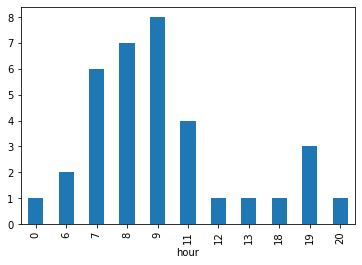

In [35]:
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

## Q 4) 
## What is the difference in Weekend vs Weekday usage pattern?
## How many words do I type on average on weekday vs weekend?



In [36]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

Tejas                197
Shaik Meeran         147
Archana              145
Prakash Sir          134
Praveen Sir          115
amit jiju            112
Ravi Sir              94
SS Abhishek Varma     89
Sravan Nethi          85
Nagashree             83
SS Srinidhi           78
Tarun Sir             71
Ismile                52
Ramesh Kauta          48
Shilanya QA           40
Kanta rao             40
Swati QA              40
Shruthi               37
+91 94800 81823       36
Shivani Sachan        35
+91 98448 31440       31
SS Manju              31
+91 97389 81800       30
Ravi Jatav            27
Lakshmi               26
+91 99001 05036       25
SS Balaraj            22
+91 94926 26062       21
Pushpendra Sir        21
+91 96322 03814       19
+91 94126 48749       18
+91 94900 90300       13
+91 96500 46407        6
+91 98666 14848        5
+91 98452 71213        3
+91 89391 45281        2
+91 72590 26767        2
Name: user, dtype: int64

In [37]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Tejas', 'Shaik Meeran', 'Archana', 'Prakash Sir', 'Praveen Sir']

In [39]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,weekday,is_weekend,hour
2,2018-08-31 15:19:00,Prakash Sir,"Don't trust rumours, banks will remain open in...",Friday,False,15
3,2018-03-09 08:16:00,Prakash Sir,"Guys, don't know if it's some kind of automate...",Friday,False,8
14,2018-03-09 08:58:00,Prakash Sir,273 so far,Friday,False,8
20,2018-04-09 06:24:00,Shaik Meeran,https://www.business-standard.com/article/comp...,Monday,False,6
21,2018-04-09 07:12:00,Shaik Meeran,https://gbhackers.com/130-malicious-android-ap...,Monday,False,7


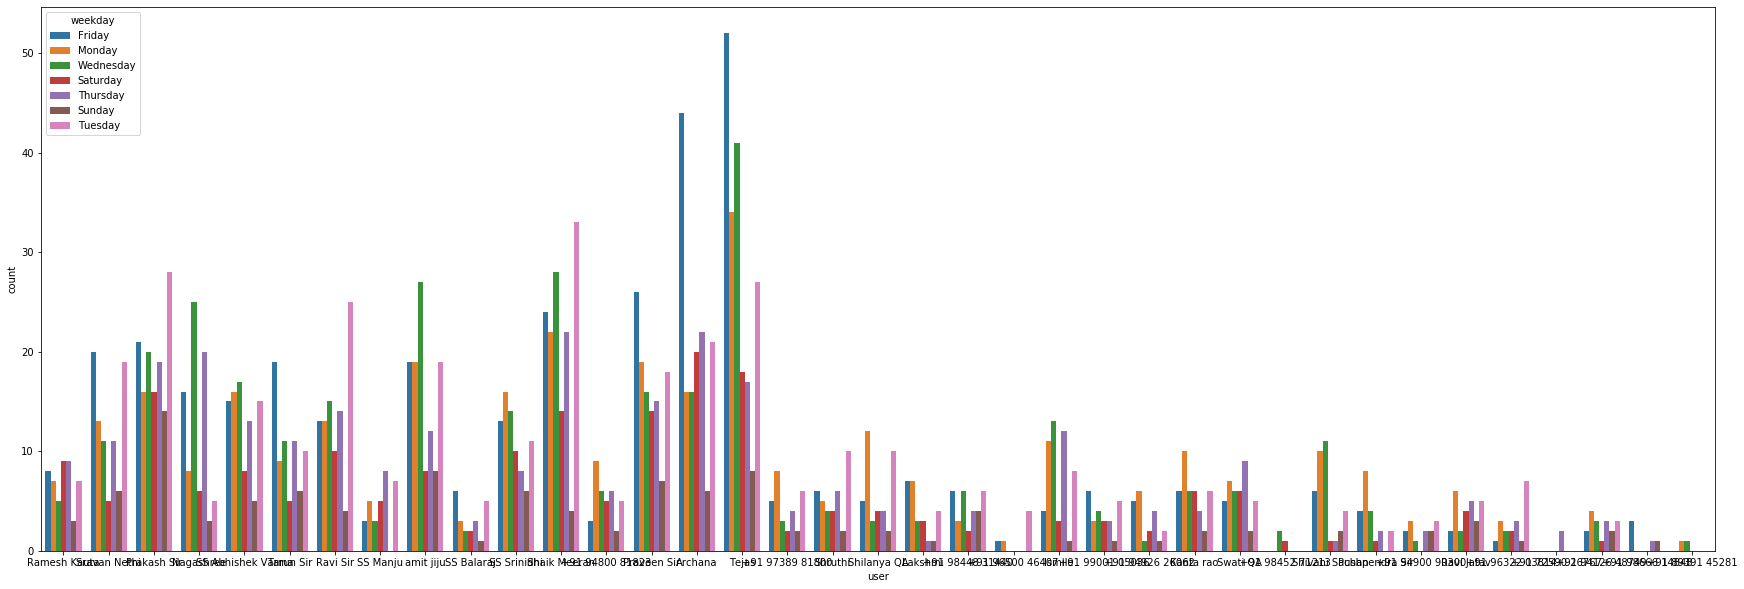

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [41]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

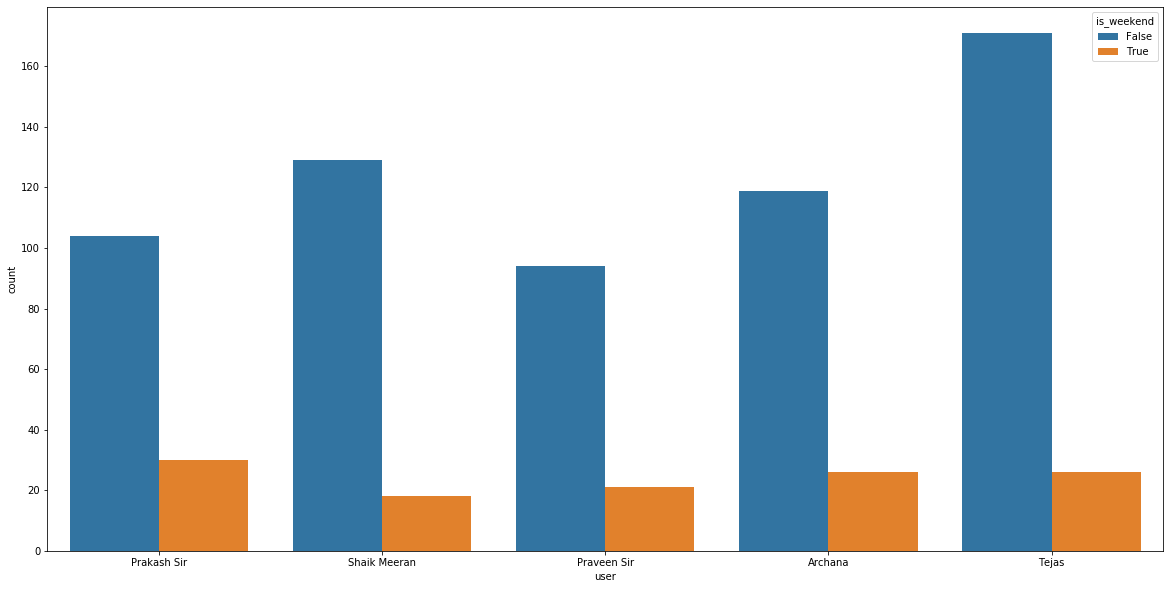

In [42]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [43]:
def word_count(val):
    return len(val.split())

In [44]:
df['no_of_words'] = df['msg'].apply(word_count)

In [46]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

In [47]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

11406

In [48]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

1595

In [49]:
total_words_weekday/5

2281.2

In [50]:
total_words_weekend/2

797.5

In [51]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
Tejas                1120
SS Srinidhi          1052
Prakash Sir           937
Ramesh Kauta          909
Shaik Meeran          822
amit jiju             759
Tarun Sir             749
Ravi Sir              731
Nagashree             687
Archana               662
SS Abhishek Varma     623
Praveen Sir           476
Ismile                447
Sravan Nethi          340
Kanta rao             202
Shivani Sachan        185
SS Balaraj            184
Shilanya QA           183
SS Manju              177
Swati QA              174
+91 99001 05036       172
+91 94800 81823       167
Shruthi               163
+91 97389 81800       154
+91 94126 48749       140
Pushpendra Sir        128
Lakshmi               106
Ravi Jatav            101
+91 98448 31440        95
+91 94926 26062        87
+91 96322 03814        79
+91 98666 14848        52
+91 96500 46407        52
+91 98452 71213        42
+91 94900 90300        35
+91 89391 45281         6
+91 72590 26767         3
Name: no_of_words, dtype: int64

In [52]:
(df.groupby('user')['no_of_words'].sum()/df.groupby('user').size()).sort_values(ascending=False)

user
Ramesh Kauta         18.937500
+91 98452 71213      14.000000
SS Srinidhi          13.487179
Tarun Sir            10.549296
+91 98666 14848      10.400000
+91 96500 46407       8.666667
Ismile                8.596154
SS Balaraj            8.363636
Nagashree             8.277108
+91 94126 48749       7.777778
Ravi Sir              7.776596
SS Abhishek Varma     7.000000
Prakash Sir           6.992537
+91 99001 05036       6.880000
amit jiju             6.776786
Pushpendra Sir        6.095238
SS Manju              5.709677
Tejas                 5.685279
Shaik Meeran          5.591837
Shivani Sachan        5.285714
+91 97389 81800       5.133333
Kanta rao             5.050000
+91 94800 81823       4.638889
Shilanya QA           4.575000
Archana               4.565517
Shruthi               4.405405
Swati QA              4.350000
+91 96322 03814       4.157895
+91 94926 26062       4.142857
Praveen Sir           4.139130
Lakshmi               4.076923
Sravan Nethi          4.000000
Rav

In [55]:
(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

user
Prakash Sir     6.992537
Tejas           5.685279
Shaik Meeran    5.591837
Archana         4.565517
Praveen Sir     4.139130
dtype: float64

In [53]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user          is_weekend
Archana       False         4.638655
              True          4.230769
Prakash Sir   False         7.875000
              True          3.933333
Praveen Sir   False         4.180851
              True          3.952381
Shaik Meeran  False         5.720930
              True          4.666667
Tejas         False         6.263158
              True          1.884615
dtype: float64

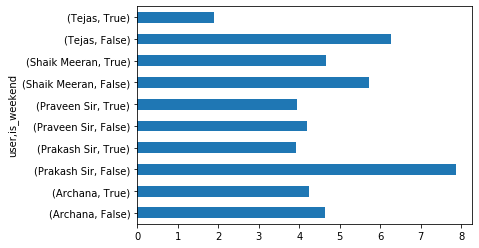

In [56]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

## Q 5)
## Most Usage - Time of Day

In [57]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,2.0,NaN,1.0,NaN,NaN,2.0,2.0
1,1.0,NaN,NaN,1.0,NaN,6.0,NaN
2,1.0,1.0,NaN,NaN,3.0,1.0,1.0
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN
5,NaN,4.0,1.0,1.0,3.0,3.0,1.0


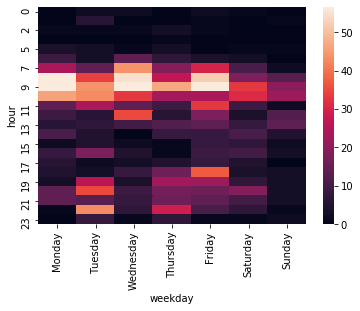

In [58]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

## Q 6)
## In any group, do I have any inclination towards responding to someone? 

In [59]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[ 345  346  348  350  363  364  480  508  566  611  651  663  667  707
  743  754  776  890  916  924  926  952  968 1032 1081 1136 1165 1377
 1474 1559 1568 1580 1644 1734 1772] (35,)


In [60]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[ 344  345  347  349  362  363  479  507  565  610  650  662  666  706
  742  753  775  889  915  923  925  951  967 1031 1080 1135 1164 1376
 1473 1558 1567 1579 1643 1733 1771] (35,)


In [61]:
prev_msgs_index = np.delete(prev_msgs_index, 0)
prev_msgs_index

array([ 345,  347,  349,  362,  363,  479,  507,  565,  610,  650,  662,
        666,  706,  742,  753,  775,  889,  915,  923,  925,  951,  967,
       1031, 1080, 1135, 1164, 1376, 1473, 1558, 1567, 1579, 1643, 1733,
       1771], dtype=int64)

In [64]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(34, 7)

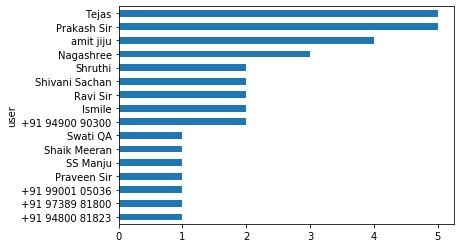

In [65]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

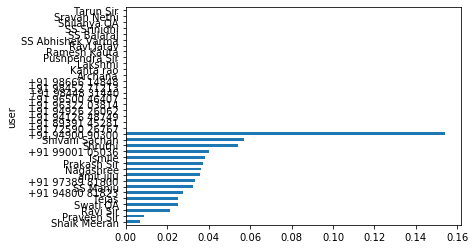

In [66]:
(df_replies.groupby(["user"])["msg"].size()/df.groupby(["user"])["msg"].size()).sort_values().plot(kind='barh')

## Q 7)
## Which are the most common words?

In [67]:
comment_words = ' '
stopwords = STOPWORDS.update(['lo', 'ge', 'Lo', 'illa', 'yea', 'ella', 'en', 'na', 'En', 'yeah', 'alli', 'ide', 'okay', 'ok', 'will'])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 


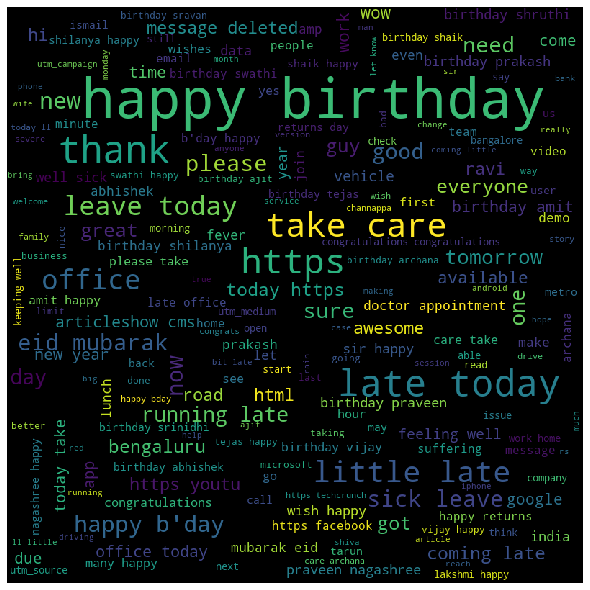

In [69]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

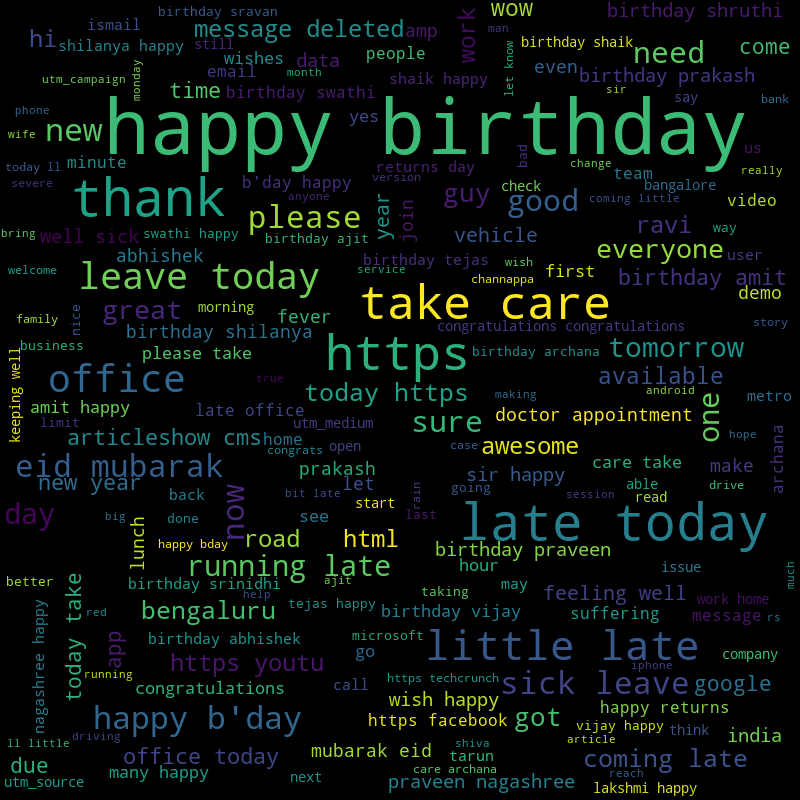

In [68]:
wordcloud.to_image()

In [3]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit()

[jovian] Saving notebook..


<IPython.core.display.Javascript object>

[jovian] Creating a new notebook on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
